# Fitting a simple linear regression model on housing data
first we tend to read data from an excel file
### MRArabshahi

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb 

In [3]:
sales=pd.read_excel("C:\\Users\\Mohammad Reza\\Desktop\\Corsera\\Machine Learning-Regression\\W1\\7. Discussion and summary\\excel\\Philadelphia_Crime_Rate_noNA.xlsx")

In [4]:
sales

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
...,...,...,...,...,...,...,...
94,174232,17.4232,13.8,25.0,4.7,Westtown,Chester
95,196515,19.6515,29.9,16.0,1.8,Whitemarsh,Montgome
96,232714,23.2714,9.9,21.0,0.2,Willistown,Chester
97,245920,24.5920,22.6,10.0,0.3,Wynnewood,Montgome


In [5]:
crime_price = sales[['sqft_living','HousePrice']]
crime_price.loc[62,:]

CrimeRate       366.1
HousePrice    96200.0
Name: 62, dtype: float64

# Linear Regression Model

In [6]:
msk = np.random.rand(len(sales)) < 0.8
train=crime_price[msk]
test=crime_price[~msk]
print(msk)
print(~msk)
print(crime_price)
print(train)
print(test)

[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True False  True  True False  True  True
  True  True False False False False  True False  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
 False  True  True  True  True False  True  True  True  True  True  True
  True False  True  True  True  True  True  True False  True  True  True
  True  True  True  True False False  True  True False  True False  True
  True  True  True False False False  True  True  True  True  True  True
  True False  True]
[False False False False False False False False  True False False False
 False False False False False False  True False False  True False False
 False False  True  True  True  True False  True False False False False
 False False False False False False  True False False False False False
  True False False False False  True False False False False False False
 False  True False False False 

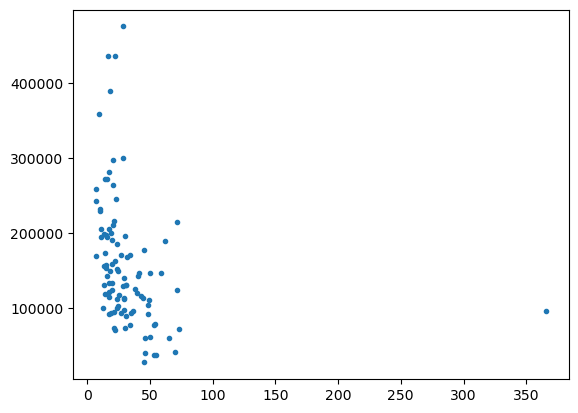

In [7]:
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.')

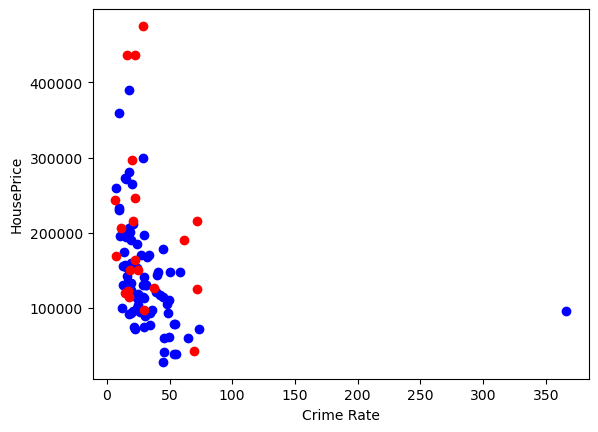

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111) 
ax1.scatter(train.CrimeRate, train.HousePrice, color='blue')
ax1.scatter(test.CrimeRate, test.HousePrice, color='red')
plt.xlabel('Crime Rate')
plt.ylabel('HousePrice')
plt.show()

# Linear Model
We use linear regression model to fit the best line with our data

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['CrimeRate']])
train_y = np.asanyarray(train[['HousePrice']])
regr.fit(train_x,train_y)
print ('Coefficients:', regr.coef_)
print ('Intercept:', regr.intercept_)

Coefficients: [[-487.70309876]]
Intercept: [161022.65324806]


# Plot Fit Model Vs. Data

Text(0, 0.5, 'HousePrice')

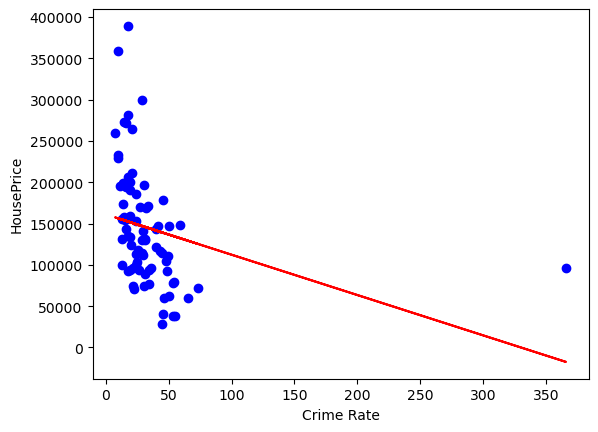

In [12]:
plt.scatter(train.CrimeRate, train.HousePrice, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Crime Rate')
plt.ylabel('HousePrice')

# Remove Single Point (Center City)
We want to remove that single point which has the highest crime rate and considerable house price from our dataframe. We tend to use iloc() function to remove that.

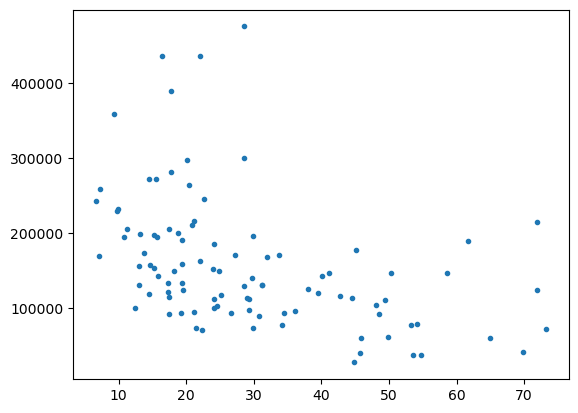

In [13]:
crime_pricex=crime_price.loc[62,:]
crime_price_withoutSP = crime_price.drop(crime_price.index[[62]])
plt.plot(crime_price_withoutSP['CrimeRate'],crime_price_withoutSP['HousePrice'],'.')

# Remake Mask for Removed Data

In [17]:
msk = np.random.rand(len(crime_price_withoutSP)) < 0.8
train=crime_price_withoutSP[msk]
test=crime_price_withoutSP[~msk]
print(msk)
print(~msk)
print(crime_price_withoutSP)
print(train)
print(test)

[ True  True  True  True  True  True False  True  True  True  True  True
 False False False  True  True False  True  True  True  True False  True
  True  True  True  True  True  True  True  True False  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
 False False  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
 False  True  True  True  True  True False False  True False  True False
 False  True  True  True  True False  True False  True  True  True  True
  True  True]
[False False False False False False  True False False False False False
  True  True  True False False  True False False False False  True False
 False False False False False False False False  True False False False
 False  True False False False False False False False False False False
  True  True False False False  True False False False False False False
 False False False False False False 

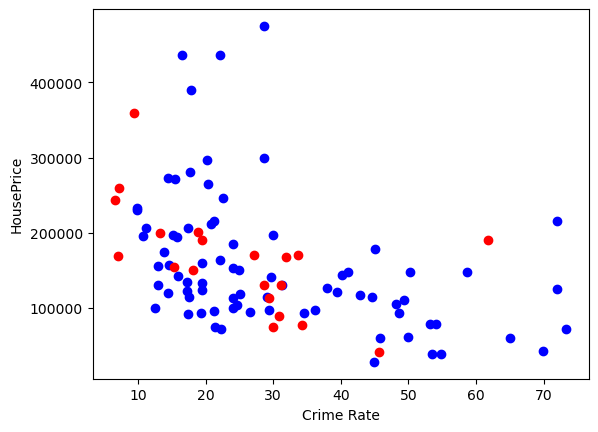

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(111) 
ax1.scatter(train.CrimeRate, train.HousePrice, color='blue')
ax1.scatter(test.CrimeRate, test.HousePrice, color='red')
plt.xlabel('Crime Rate')
plt.ylabel('HousePrice')
plt.show()

# Linear Model for Reduced Data

In [38]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['CrimeRate']])
train_y = np.asanyarray(train[['HousePrice']])
reg1=regr.fit(train_x,train_y)
print ('Coefficients:', reg1.coef_)
print ('Intercept:', reg1.intercept_)

Coefficients: [[-2208.31660682]]
Intercept: [223862.17776228]


Text(0, 0.5, 'HousePrice')

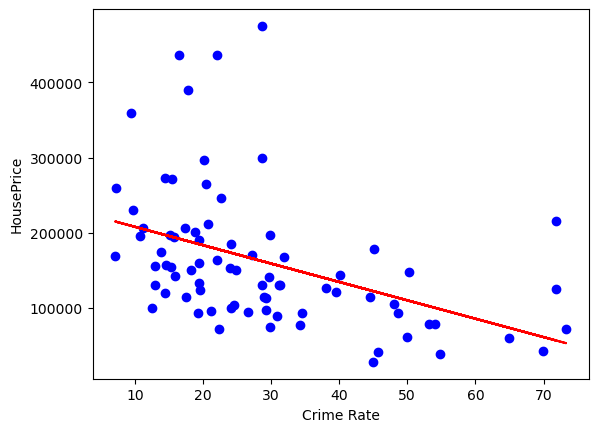

In [63]:
plt.scatter(train.CrimeRate, train.HousePrice, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Crime Rate')
plt.ylabel('HousePrice')

## Removing five influential observation points which has the highest value

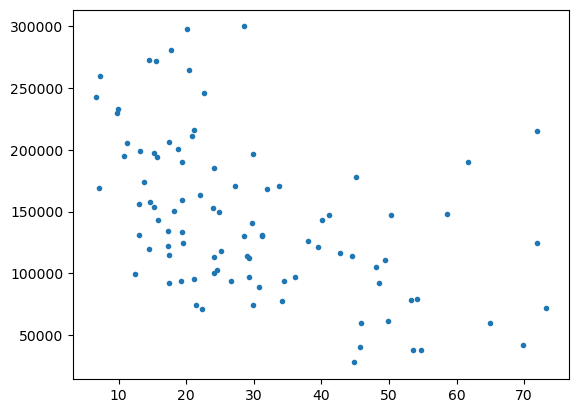

In [20]:
crime_price_removedHIP = crime_price_withoutSP[crime_price_withoutSP['HousePrice'] < 350000]
plt.plot(crime_price_removedHIP['CrimeRate'],crime_price_removedHIP['HousePrice'],'.')

In [41]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x_noHIP = np.asanyarray(crime_price_removedHIP[['CrimeRate']])
train_y_noHIP = np.asanyarray(crime_price_removedHIP[['HousePrice']])
reg2=regr.fit(train_x_noHIP,train_y_noHIP)

print ('Coefficients without influential points:', reg2.coef_)
print ('Intercept without influential points:', reg2.intercept_)

print ('Coefficients with influential points:', reg1.coef_)
print ('Intercept with influential points:', reg1.intercept_)

Coefficients without influential points: [[-1838.56264859]]
Intercept without influential points: [199098.8526698]
Coefficients with influential points: [[-2208.31660682]]
Intercept with influential points: [223862.17776228]
